In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ayushnautiyal10","key":"ce3dcb06e8ff4ddbc653dd462744d9ef"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = 'chest-xray-pneumonia.zip' 
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import glob 
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


In [ ]:
path = '/content/chest_xray/'
train_folder=path+"train/"
train_normal_dir=train_folder+"NORMAL/"
train_pneu_dir=train_folder+"PNEUMONIA/"
test_folder=path+"test/"
test_normal_dir=test_folder+"NORMAL/"
test_pneu_dir=test_folder+"PNEUMONIA/"
val_folder=path+"val/"
val_normal_dir=val_folder+"NORMAL/"
val_pneu_dir=val_folder+"PNEUMONIA/"

In [ ]:
img_width=196
img_height=196
batch_size=64
epochs=10

print("Variable declaration completed.")

Variable declaration completed.


In [ ]:

train_class_names=os.listdir(train_folder)
print("Train class names: %s" % (train_class_names))
test_class_names=os.listdir(test_folder)
print("Test class names: %s" % (test_class_names))
val_class_names=os.listdir(val_folder)
print("Validation class names: %s" % (val_class_names))

print("\nDataset class name listing completed.")

Train class names: ['NORMAL', 'PNEUMONIA']
Test class names: ['NORMAL', 'PNEUMONIA']
Validation class names: ['NORMAL', 'PNEUMONIA']

Dataset class name listing completed.


In [ ]:
def Get_Xray_Type(argument):
    switcher = {
        "NORMAL": "Normal",
        "PNEUMONIA": "Pneumonia",
    }
    return switcher.get(argument, "Invalid X-ray")

print("Declaration of functions completed.")

Declaration of functions completed.


In [ ]:
train_normal_cases = glob.glob(train_normal_dir + '*jpeg')
train_pneu_cases = glob.glob(train_pneu_dir + '*jpeg')

test_normal_cases = glob.glob(test_normal_dir + '*jpeg')
test_pneu_cases = glob.glob(test_pneu_dir + '*jpeg')

val_normal_cases = glob.glob(val_normal_dir + '*jpeg')
val_pneu_cases = glob.glob(val_pneu_dir + '*jpeg')

train_list = []
test_list = []
val_list = []

for x in train_normal_cases:
    train_list.append([x, "Normal"])
for x in train_pneu_cases:
    train_list.append([x, "Pneumonia"])
    
for x in test_normal_cases:
    test_list.append([x, "Normal"])
    
for x in test_pneu_cases:
    test_list.append([x, "Pneumonia"])
    
for x in val_normal_cases:
    val_list.append([x, "Normal"])
    
for x in val_pneu_cases:
    val_list.append([x, "Pneumonia"])

train_df = pd.DataFrame(train_list, columns=['image', 'Diagnos'])
print(train_df.shape)
test_df = pd.DataFrame(test_list, columns=['image', 'Diagnos'])
print(test_df.shape)
val_df = pd.DataFrame(val_list, columns=['image', 'Diagnos'])
print(val_df.shape)

(5216, 2)
(624, 2)
(16, 2)


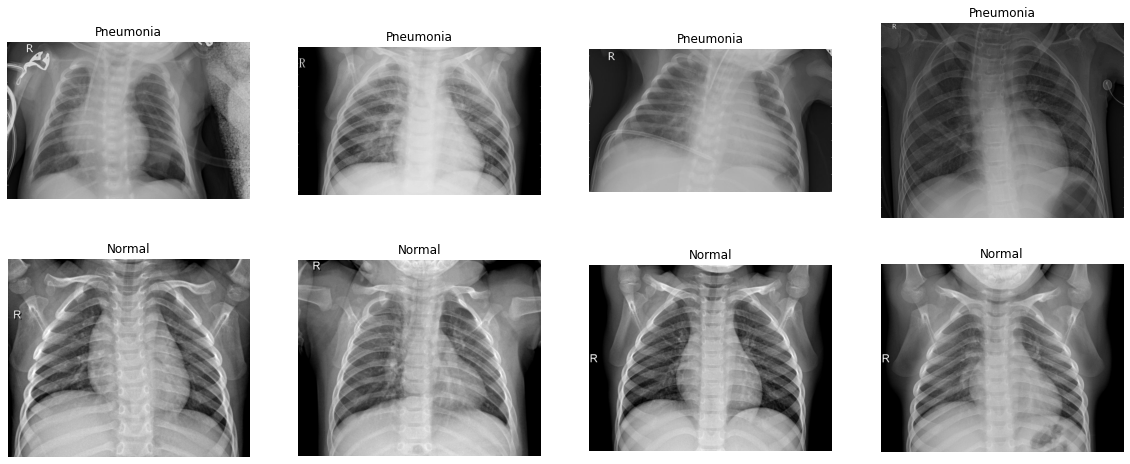

In [ ]:


plt.figure(figsize=(20,8))
for i,img_path in enumerate(train_df[train_df['Diagnos'] == "Pneumonia"][0:4]['image']):
    plt.subplot(2,4,i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Pneumonia')
    
for i,img_path in enumerate(train_df[train_df['Diagnos'] == "Normal"][0:4]['image']):
    plt.subplot(2,4,4+i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Normal')

In [ ]:
x=[] 
y=[] 

for folder in os.listdir(train_folder):
    image_list=os.listdir(train_folder+"/"+folder)
    for img_name in image_list:
    
        img=image.load_img(train_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))

        img=image.img_to_array(img)

        img=preprocess_input(img) 

        x.append(img) 
        y.append(train_class_names.index(folder)) 
        
print("Preparing Training Dataset Completed.")

Preparing Training Dataset Completed.


In [ ]:
test_images=[]
test_images_Original=[]
test_image_label=[] 

for folder in os.listdir(test_folder):
    image_list=os.listdir(test_folder+"/"+folder)
    for img_name in image_list:
        img=image.load_img(test_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))
        img=image.img_to_array(img)
        test_images_Original.append(img.copy())
        img=preprocess_input(img) 
        test_images.append(img) 
        test_image_label.append(test_class_names.index(folder))

In [ ]:
val_images=[]
val_images_Original=[]
val_image_label=[]

for folder in os.listdir(val_folder):
    image_list=os.listdir(val_folder+"/"+folder)
    for img_name in image_list:

        img=image.load_img(val_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))
        img=image.img_to_array(img)

        val_images_Original.append(img.copy())

        img=preprocess_input(img)
        val_images.append(img) 
        val_image_label.append(val_class_names.index(folder))
        
print("Preparing Validation Dataset Completed.")

Preparing Validation Dataset Completed.


In [ ]:
print("Training Dataset")

x=np.array(x) 
print(x.shape)

y=to_categorical(y)

print(y.shape)

print("Test Dataset")

test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label)
print(test_image_label.shape)
print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=(val_image_label)
print(val_image_label)

Training Dataset
(5216, 196, 196, 3)
(5216, 2)
Test Dataset
(624, 196, 196, 3)
(624, 2)
Validation Dataset
(16, 196, 196, 3)
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
print("Summary of default VGG16 model.\n")

from tensorflow.keras.applications import VGG16
model_vgg16=VGG16(weights='imagenet')
model_vgg16.summary()

Summary of default VGG16 model.

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D) 

In [ ]:
print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")
input_layer=layers.Input(shape=(img_width,img_height,3))
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)
model_vgg16.summary()

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 196, 196, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 196, 196, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 196, 196, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 98, 98, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 98, 98, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 98, 98, 128)       147584    
                                 

In [ ]:
print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output 
flatten=layers.Flatten()(last_layer) 
output_layer=layers.Dense(2,activation='softmax')(flatten)
model=models.Model(inputs=input_layer,outputs=output_layer)
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 196, 196, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 196, 196, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 196, 196, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 98, 98, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 98, 98, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 98, 98, 128)       147584    
                     

In [ ]:
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 196, 196, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 196, 196, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 196, 196, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 98, 98, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 98, 98, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 98, 98, 128)       147584    
                                                             

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")

Model compilation completed.


In [ ]:
model.fit(x,y,epochs=epochs,batch_size=batch_size,verbose=True,validation_data=(test_images,test_image_label))

print("Fitting the model completed.")

Epoch 1/10
82/82 [==============================] - 40s 344ms/step - loss: 1.2249 - accuracy: 0.9429 - val_loss: 3.5721 - val_accuracy: 0.8718
Epoch 2/10
82/82 [==============================] - 23s 280ms/step - loss: 0.1765 - accuracy: 0.9860 - val_loss: 10.1826 - val_accuracy: 0.7468
Epoch 3/10
82/82 [==============================] - 24s 297ms/step - loss: 0.0491 - accuracy: 0.9939 - val_loss: 5.5640 - val_accuracy: 0.8317
Epoch 4/10
82/82 [==============================] - 25s 311ms/step - loss: 0.0312 - accuracy: 0.9962 - val_loss: 7.8030 - val_accuracy: 0.7885
Epoch 5/10
82/82 [==============================] - 25s 300ms/step - loss: 0.0133 - accuracy: 0.9979 - val_loss: 8.7320 - val_accuracy: 0.7853
Epoch 6/10
82/82 [==============================] - 24s 298ms/step - loss: 0.0096 - accuracy: 0.9985 - val_loss: 8.1146 - val_accuracy: 0.7997
Epoch 7/10
82/82 [==============================] - 25s 303ms/step - loss: 0.0107 - accuracy: 0.9987 - val_loss: 11.0984 - val_accuracy: 0.75

In [ ]:
model.save('/content/Pneumonia.h5')

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('Pneumonia.h5')

In [ ]:
loss, accuracy = model.evaluate(test_images,test_image_label,batch_size=64)

10/10 [==============================] - 3s 261ms/step - loss: 11.2922 - accuracy: 0.7628


In [ ]:
print('Test Loss is {} %'.format(loss*100))
print('Test Accuracy is {} %'.format(accuracy*100))

Test Loss is 1129.2237281799316 %
Test Accuracy is 76.28205418586731 %


1/1 [==============================] - 2s 2s/step


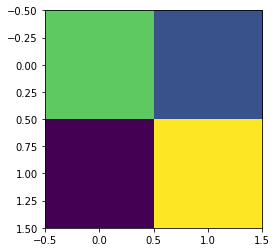

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
pred = np.argmax(model.predict(val_images,100),axis=1)
pred
cm = confusion_matrix(val_image_label,pred)
cm
plt.imshow(cm)

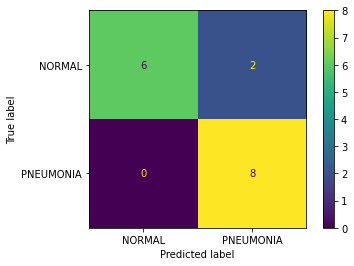

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['NORMAL','PNEUMONIA'])

disp = disp.plot()

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(val_image_label, pred, labels=[0,1]))